In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.graph_objs as go
from plotly.offline import iplot

In [3]:
path = os.getcwd()
data = path + '/dataset/bank/bank-full.csv'
df = pd.read_csv(data, sep=';')
print(f'size of the data --> {df.shape}')
df.head()

size of the data --> (45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
# create table listing column types etc
df_info = pd.DataFrame([df.columns,df.dtypes, df.isna().sum(), df.nunique()])
df_info = df_info.T
df_info.columns = ['column','dtype','NA_count', 'unique_count']
print(f'check for duplicates --> {df.duplicated().sum()}')
df_info

check for duplicates --> 0


,column,dtype,NA_count,unique_count
0,age,int64,0,77
1,job,object,0,12
2,marital,object,0,3
3,education,object,0,4
4,default,object,0,2
5,balance,int64,0,7168
6,housing,object,0,2
7,loan,object,0,2
8,contact,object,0,3
9,day,int64,0,31


## Bank Client data:
1 - age: (numeric)

2 - job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education: (categorical: primary, secondary, tertiary and unknown)

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - balance: Balance of the individual.

## Related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone') 

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

## Other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Output variable (desired target):

16 - y - has the client subscribed a term deposit? (binary: 'yes','no')

## Term Deposits


A term deposit is a fixed-term investment that includes the deposit of money into an account at a financial institution. Term deposit investments usually carry short-term maturities ranging from one month to a few years and will have varying levels of required minimum deposits.

In [5]:
def plot_bar(column, df):
    # temp df 
    temp_1 = pd.DataFrame()
    # count categorical values
    temp_1['No_deposit'] = df[df['y'] == 'no'][column].value_counts()
    temp_1['Yes_deposit'] = df[df['y'] == 'yes'][column].value_counts()
    temp_1.plot(kind='bar')
    plt.xlabel(f'{column}')
    plt.ylabel('Number of clients')
    plt.title('Distribution of {} and deposit'.format(column))
    plt.show();

# Distribution of categorical

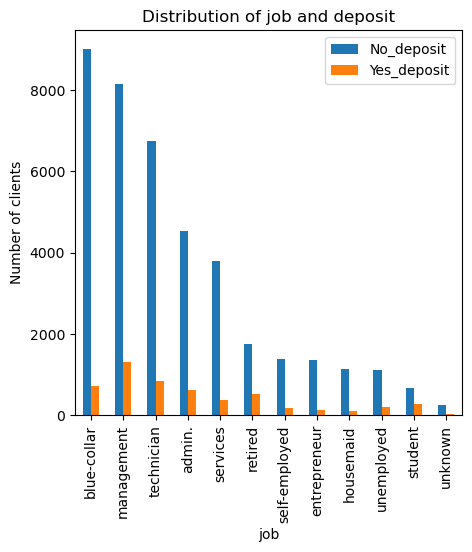

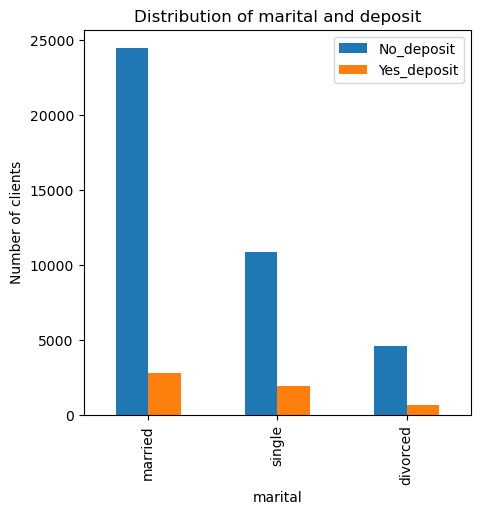

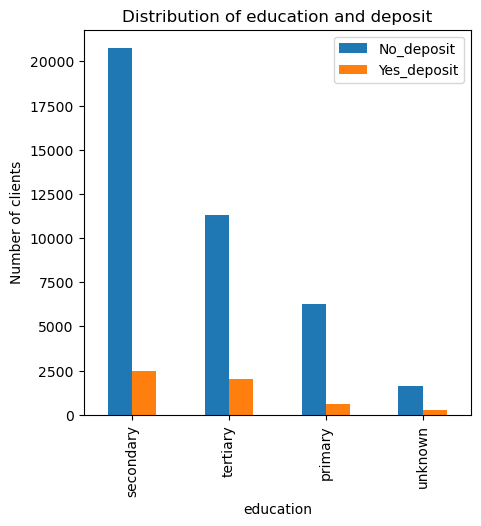

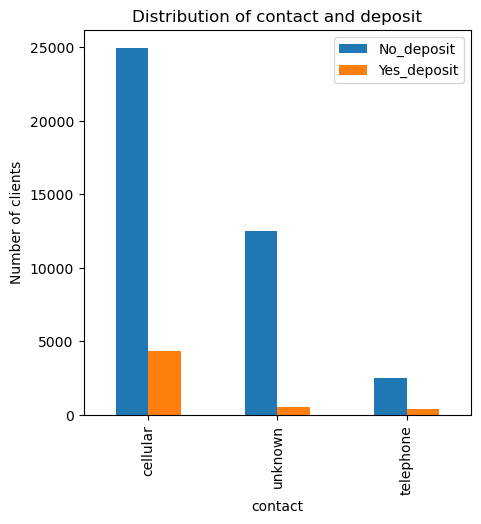

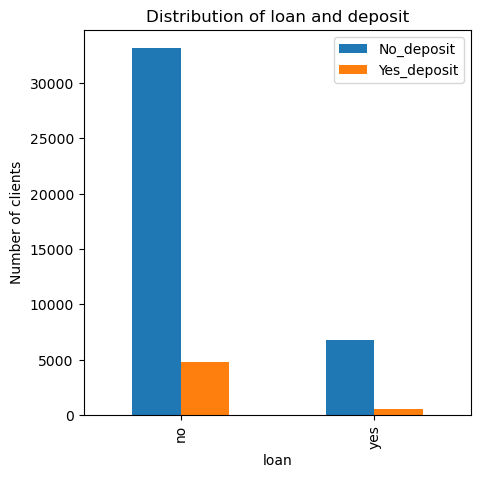

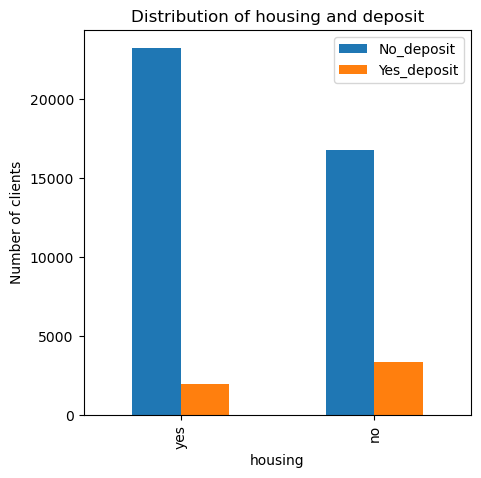

(None, None, None, None, None, None)

In [6]:
plot_bar('job', df), plot_bar('marital', df), plot_bar('education', df), plot_bar('contact', df), plot_bar('loan', df), plot_bar('housing', df)

# Distribution of numeric data

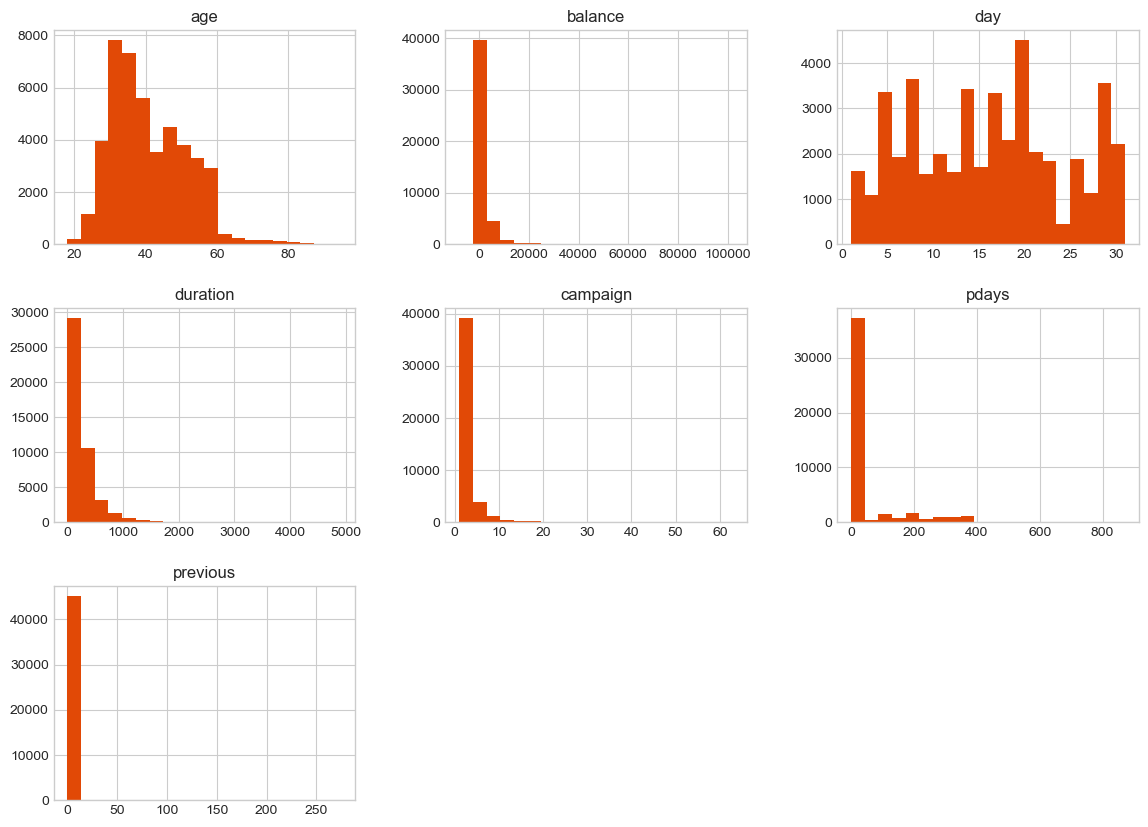

In [7]:
plt.style.use('seaborn-whitegrid')

df.hist(bins=20, figsize=(14,10), color='#E14906')
plt.show()

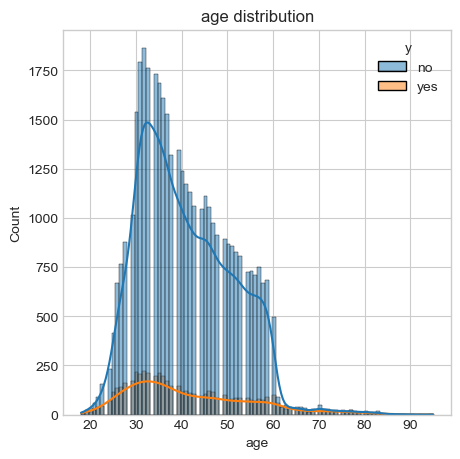

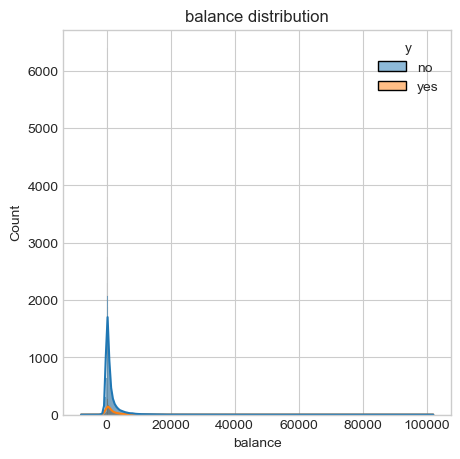

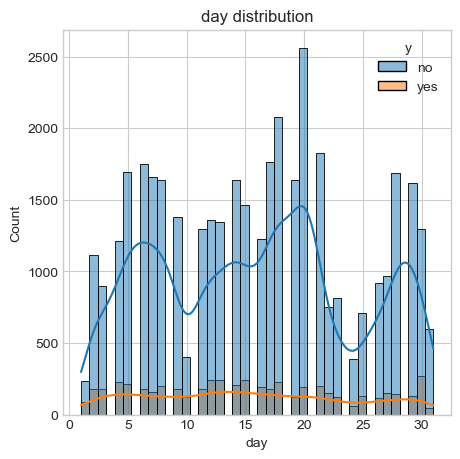

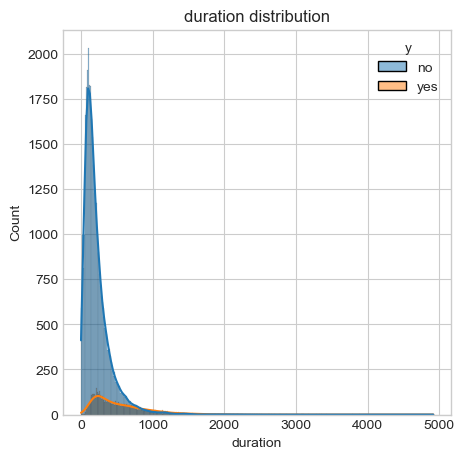

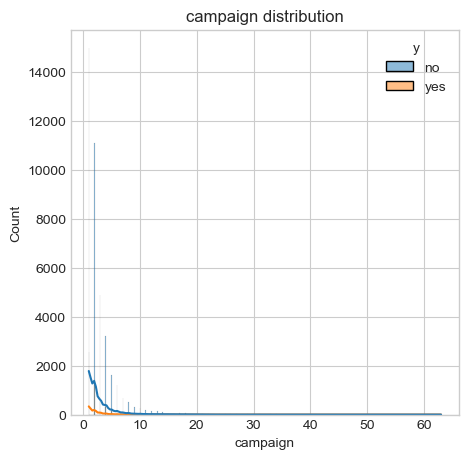

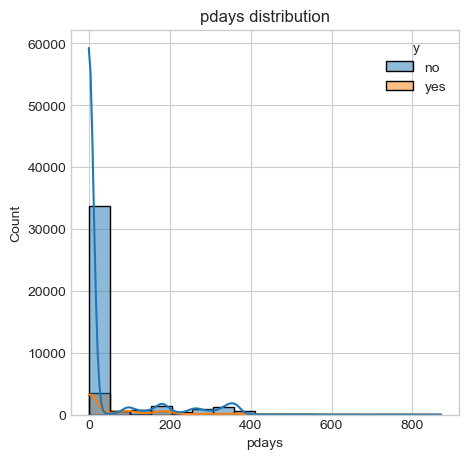

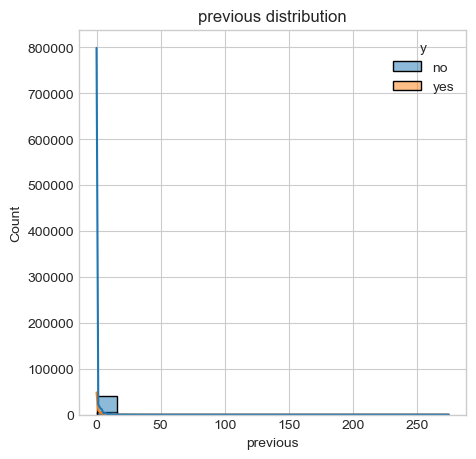

In [8]:
for c in df.columns:
    if df[c].dtype == 'int64' or df[c].dtype == 'float64':
        sns.histplot(x = df[c], hue = df['y'], kde = True)
        plt.title(f'{c} distribution')
        plt.show()

# Outliers

When the data is (approximately) normally distributed, we can use the Z-score treatment to deal with outliers. 

However, as we can see from the distributions, most our columns have skewed distributions. So we can try using the IQR method. 

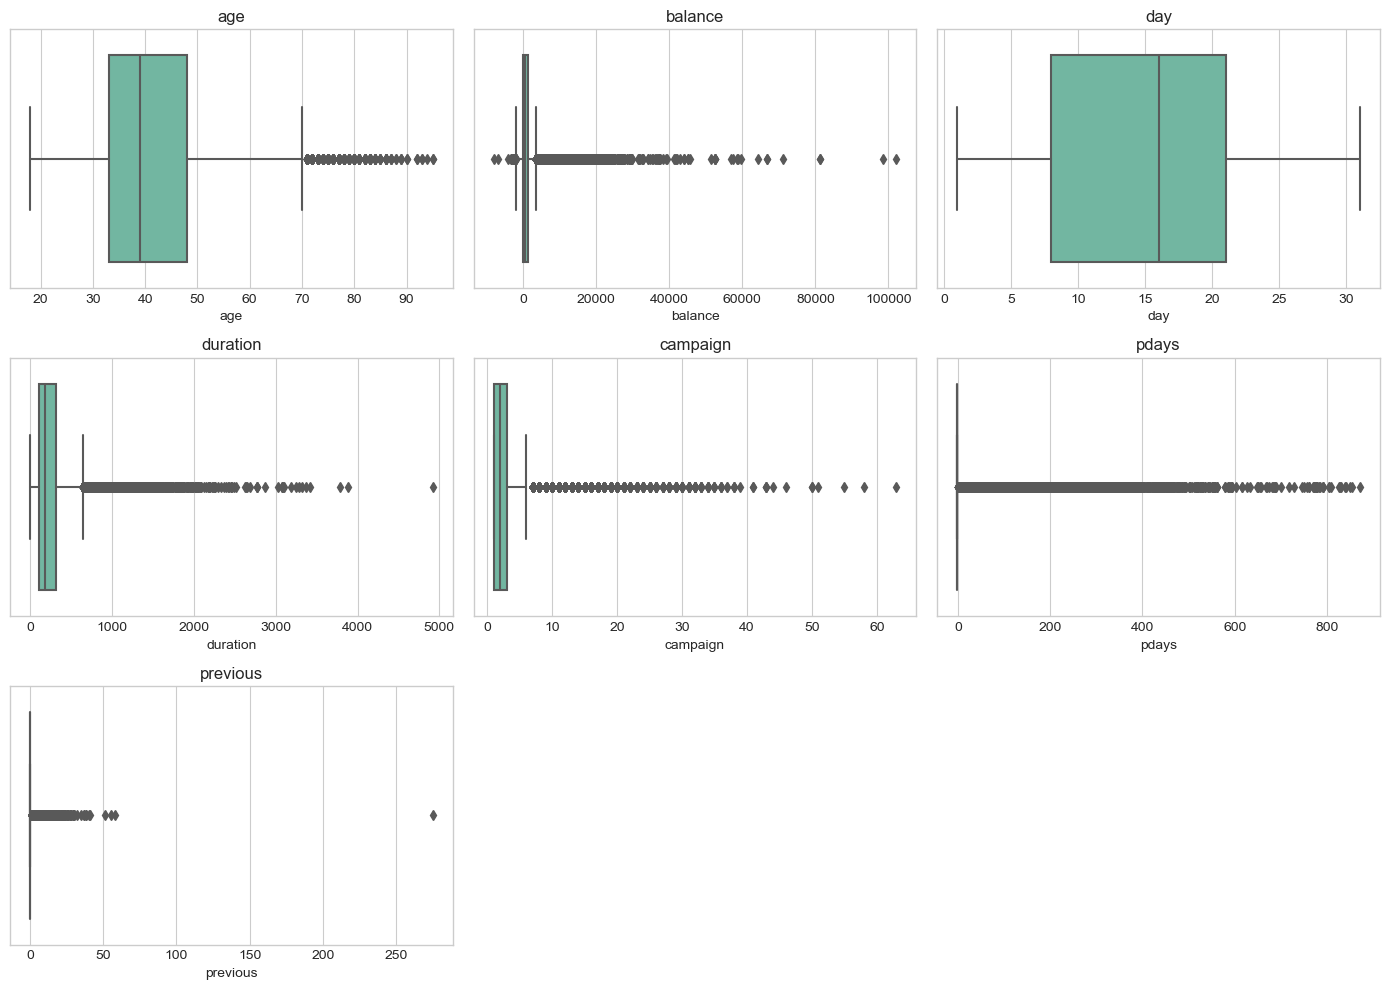

In [9]:
# plot in a grid
plt.figure(figsize=(14,10))
i = 1
for c in df.columns:
    if df[c].dtype == 'int64' or df[c].dtype == 'float64':
        plt.subplot(3, 3, i)
        i+=1
        sns.boxplot(x = df[c], hue = df['y'], palette='Set2')
        plt.title(f'{c}')
plt.tight_layout()        
plt.show()

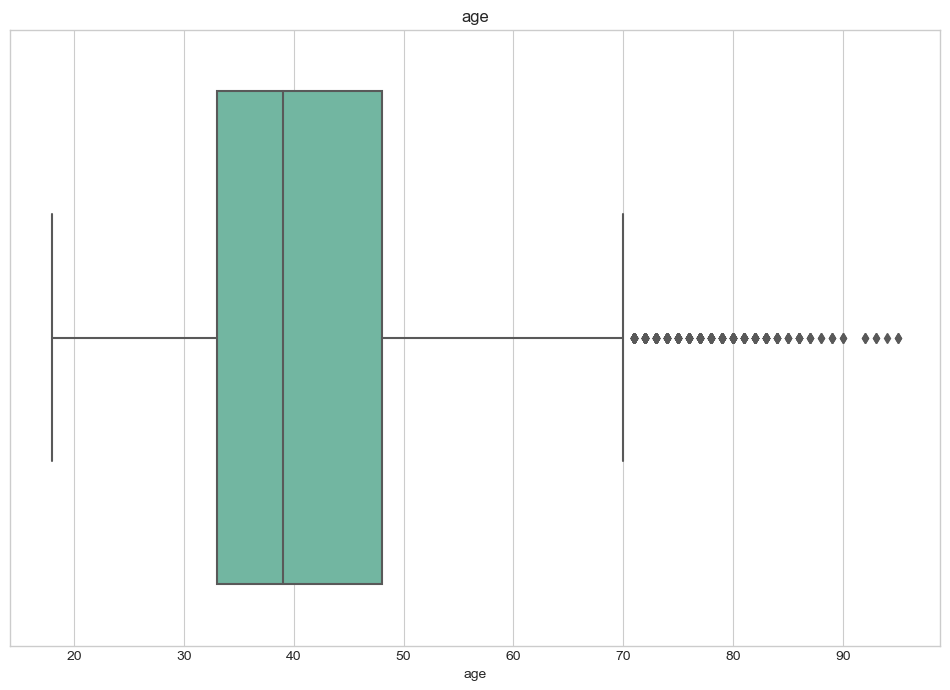

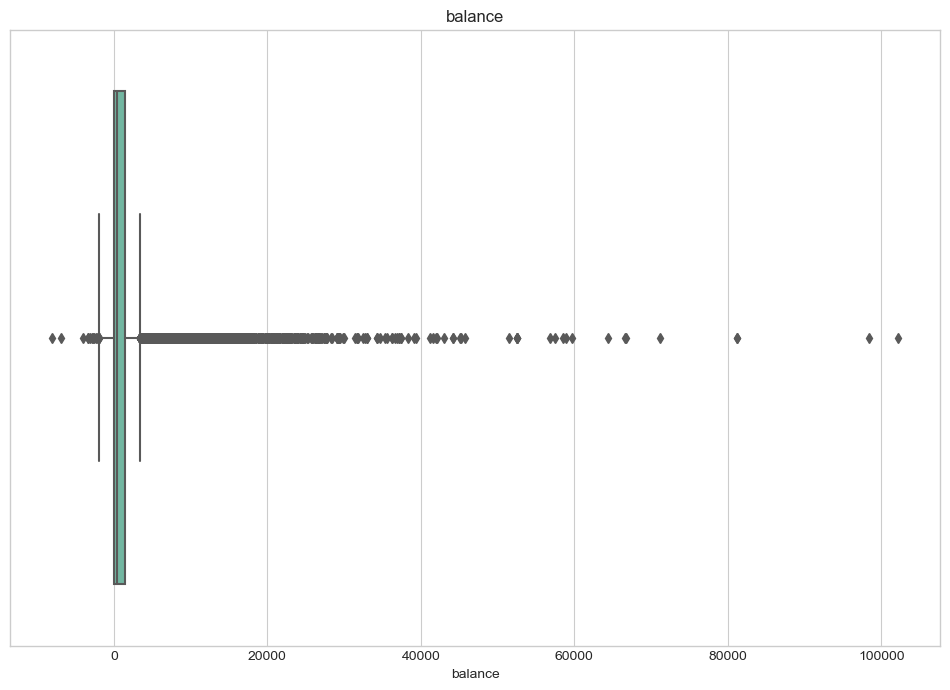

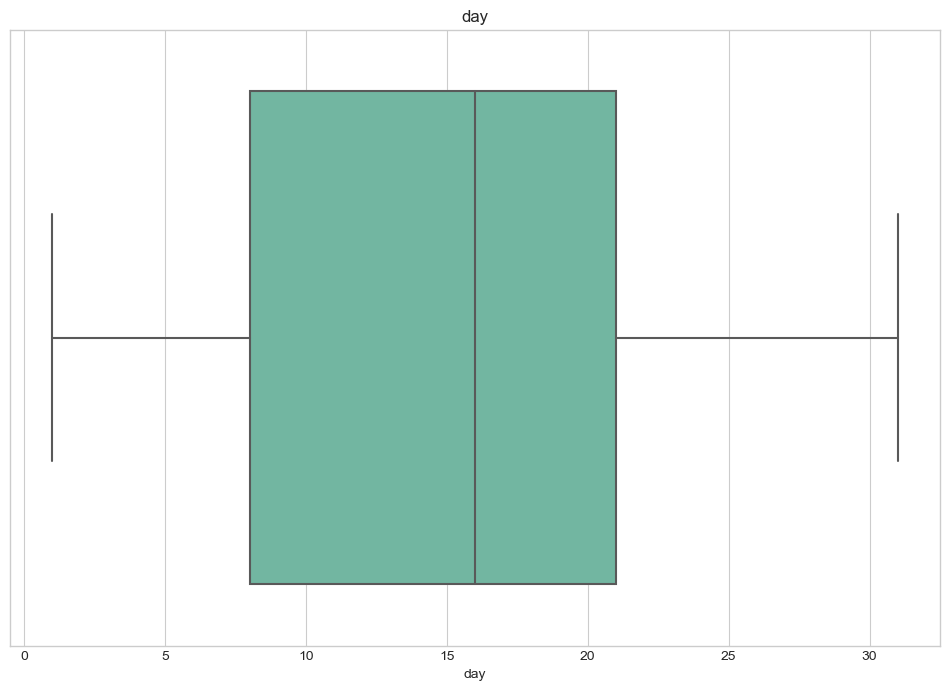

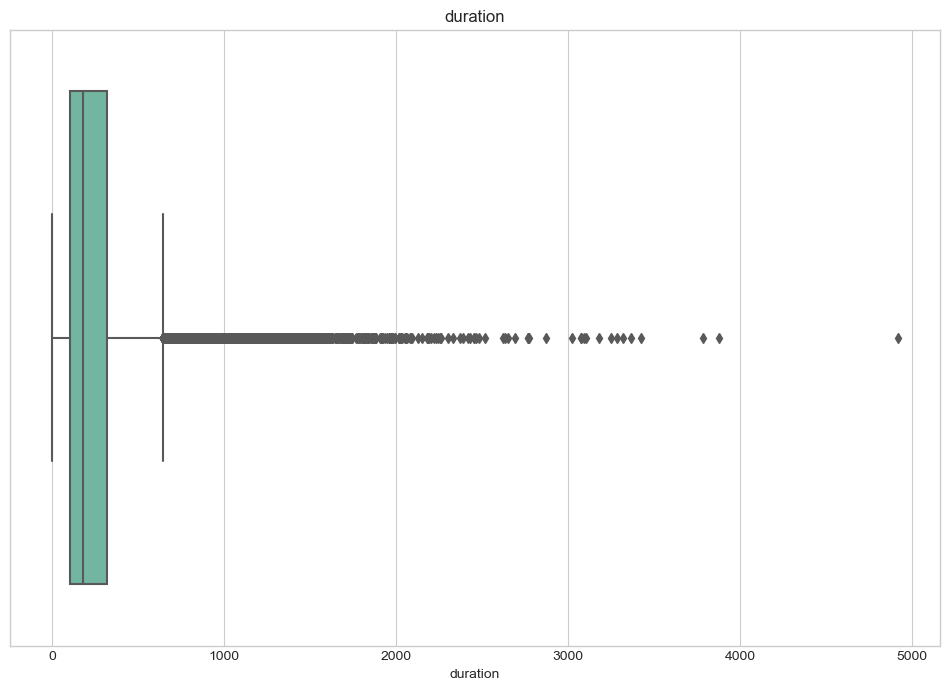

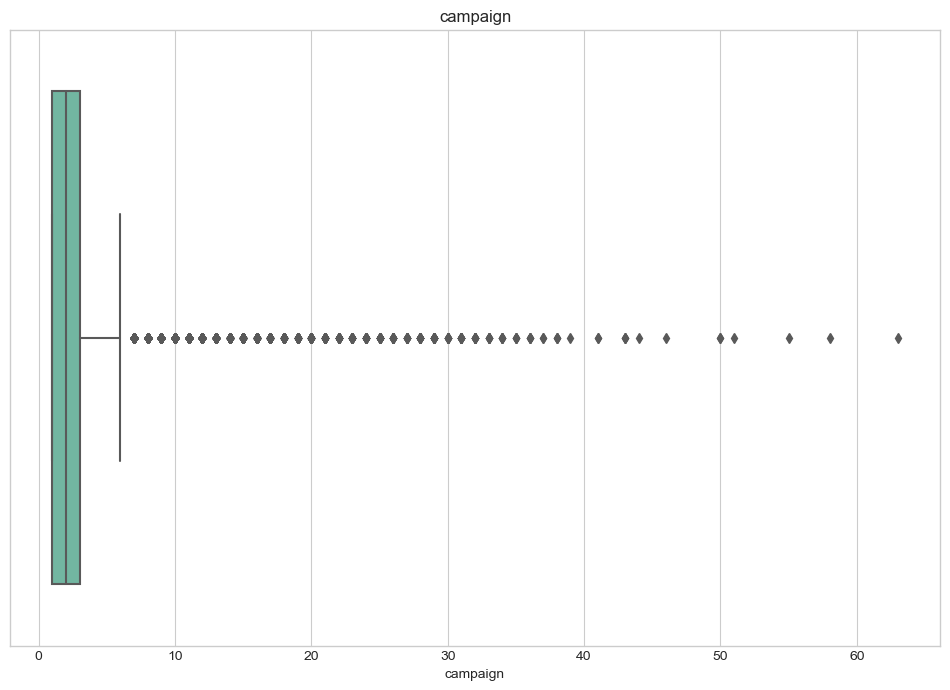

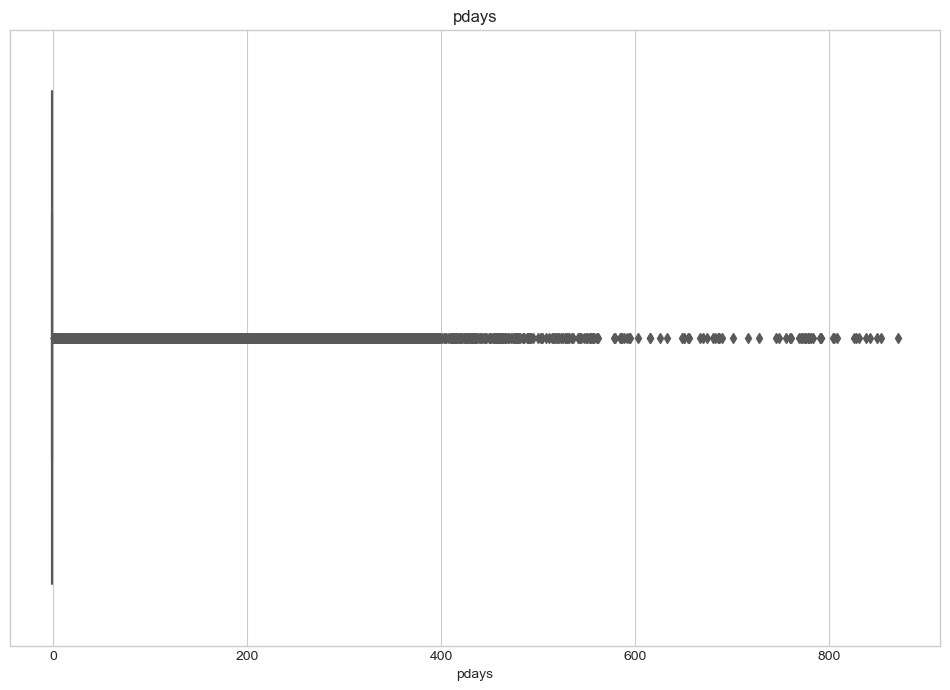

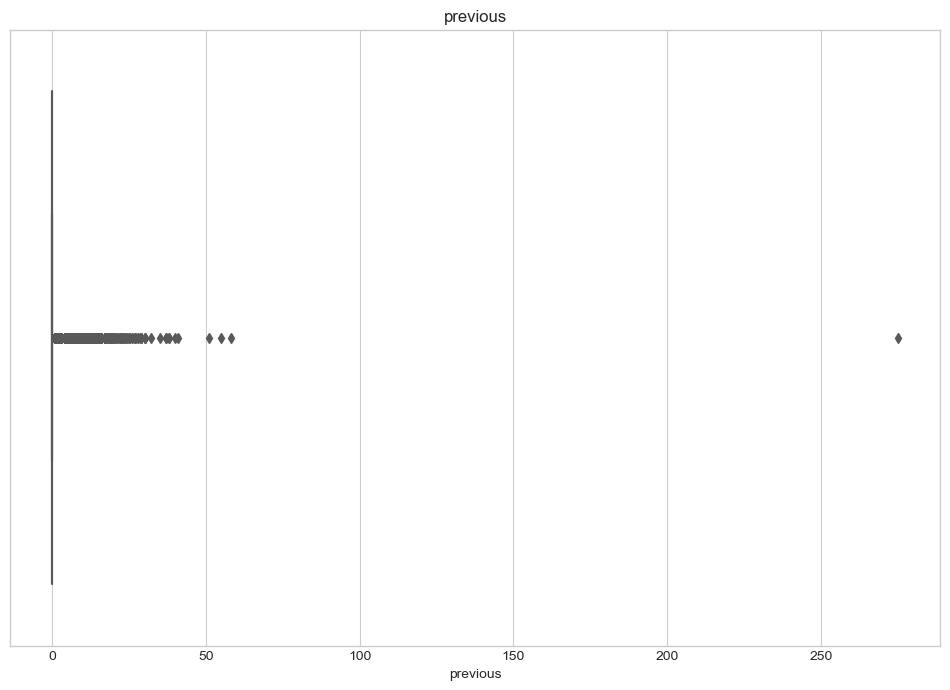

In [10]:
# plot seperately
for c in df.columns:
    if df[c].dtype == 'int64' or df[c].dtype == 'float64':
        plt.figure(figsize=(12,8))
        sns.boxplot(x = df[c], hue = df['y'], palette='Set2')
        plt.title(f'{c}')
        plt.show()


In [11]:
'''write functions to be utilised later to deal with outliers'''

# write a function to find outliers using IQR method
def iqr(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return lower_bound, upper_bound
# write a function to trim outliers
def trim(df,col):
    lower_bound, upper_bound = iqr(df,col)
    df_trim = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
    return df_trim
# write a function to cap outliers
def cap(df,col):
    lower_bound, upper_bound = iqr(df,col)
    df_cap = df.copy()
    df_cap[col] = df_cap[col].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    return df_cap
# write a function to replace outliers with threshold
def thresh(df, col, thresh):
    df_thresh = df.copy()
    df_thresh[col] = df_thresh[col].apply(lambda x: thresh if x > thresh else x)
    return df_thresh
# write a function to replace outliers with median
def replace_median(df,col):
    lower_bound, upper_bound = iqr(df,col)
    df_replace = df.copy()
    median = df_replace[col].median()
    df_replace[col] = df_replace[col].apply(lambda x: median if x < lower_bound or x > upper_bound else x)
    return df_replace
# write a function to replace outliers with mean
def replace_mean(df,col):
    lower_bound, upper_bound = iqr(df,col)
    df_replace = df.copy()
    mean = df_replace[col].mean()
    df_replace[col] = df_replace[col].apply(lambda x: mean if x < lower_bound or x > upper_bound else x)
    return df_replace

# Deciding on method for Outliers

We have to decide how to deal with the outliers. In general, when dealing with quantities like bank "balance" or income that have a wide spread, it is common to check if the log-distribution is helpful in lessoning the effect of outliers. 


For the "Duration" column, as already mentioned in the introduction, since it is the duration of last contact, it is only known when the outcome 'y' also becomes known. Thus we don't need to use this in our predictive model.  


For the "age" column, we can tell that the distribution appears bi-modal or tri-modal but it is not heavily affected by outliers. Also, we don't want to lose meaningful information by forcing it to fit a distribution.


The "days" column is evenly distributed and there are no outliers. 


The "camapign" column tells us how many times the client was contacted during the campaign. As we can see from the code below, only 3% of the values are above 10, and only 1% are above 15. In this case it might not be a bad idea to use capping to impute these outliers. We may set the threshold to 10 or 15 and compare results.


The "pdays" columns tells us how many days have passed since last contact. The value 999 means there was no last contact. By analysing the column, we can see that there is no observation of 999, and infact 82% of the observations are -1. So there is an issue in data description and we will be taking -1 as 999. 


Lastly, the "previous" column tells us how many times the client was contacted. As we can see from the analysis below, only 2% of clients were contacted more than 5 times. Capping might be the way to deal with outliers here, or better solution might be to create bins of variable length. 


It can be seen from the heat map that pdays and previous are highly correlated. It might be worth considering to drop on of these columns. 

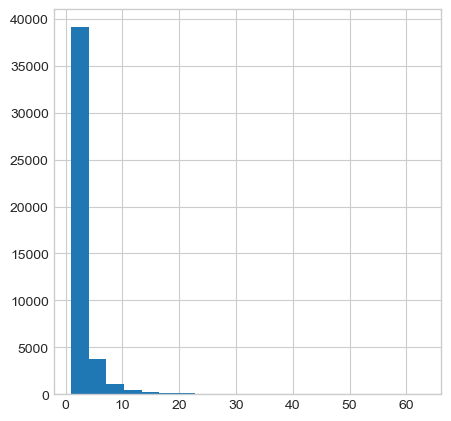

Unique values in campaign --> 
[ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44]
Proportion of values above 10 --> 0.03
Proportion of values above 15 --> 0.01
Proportion of values above 20 --> 0.01


In [12]:
'''analyse campaign column'''

plt.hist(df['campaign'], bins=20)
plt.show()
camp = df['campaign'].unique()
print(f'Unique values in campaign --> ')
print(camp)
# find proportion of values above thresholds
for i in [10,15,20]:
    print(f'Proportion of values above {i} --> {round(len(df[df["campaign"] > i])/len(df),2)}')
    

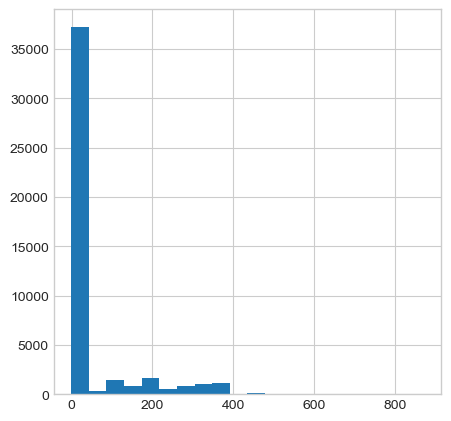

Unique values in pdays --> 
Number of unique values --> 48
Max value --> 63
Min value --> 1
Number of values equal to 999 --> 0
Number of values equal to 0 --> 0
Number of values equal to -1 --> 36954
Proportion of values equal to -1 --> 0.82


In [13]:
'''analyse pdays column'''

plt.hist(df['pdays'], bins=20)
plt.show()
unq = df['pdays'].unique()
print(f'Unique values in pdays --> ')
# print(unq)
print(f'Number of unique values --> {len(camp)}')
print(f'Max value --> {max(camp)}')
print(f'Min value --> {min(camp)}')
print(f'Number of values equal to 999 --> {len(df[df["pdays"] == 999])}')
print(f'Number of values equal to 0 --> {len(df[df["pdays"] == 0])}')
print(f'Number of values equal to -1 --> {len(df[df["pdays"] == -1])}')
print(f'Proportion of values equal to -1 --> {round(len(df[df["pdays"] == -1])/len(df),2)}')
# find proportion of values above thresholds
# for i in [10,15,20]:
#     print(f'Proportion of values above {i} --> {round(len(df[df["campaign"] > i])/len(df),2)}')
    

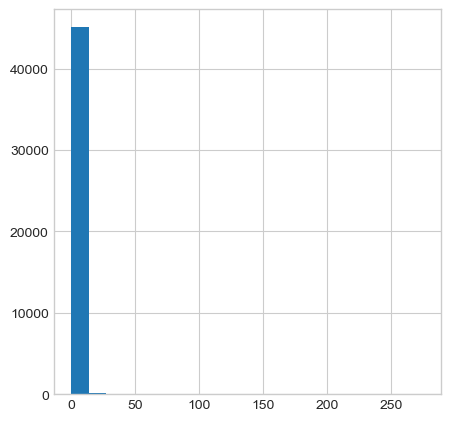

Unique values in previous --> 
[  0   3   1   4   2  11  16   6   5  10  12   7  18   9  21   8  14  15
  26  37  13  25  20  27  17  23  38  29  24  51 275  22  19  30  58  28
  32  40  55  35  41]
Proportion of values above 5 --> 0.024
Proportion of values above 10 --> 0.007
Proportion of values above 15 --> 0.002
Proportion of values above 20 --> 0.001
0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
20         8
23         8
18         6
22         6
24         5
27         5
21         4
29         4
25         4
30         3
38         2
37         2
26         2
28         2
51         1
275        1
58         1
32         1
40         1
55         1
35         1
41         1
Name: previous, dtype: int64


In [14]:
'''analyse previous column'''

plt.hist(df['previous'], bins=20)
plt.show()
unq = df['previous'].unique()
print(f'Unique values in previous --> ')
print(unq)
# find proportion of values above thresholds
for i in [5,10,15,20]:
    print(f'Proportion of values above {i} --> {round(len(df[df["previous"] > i])/len(df),3)}')
print(df['previous'].value_counts())
    

/var/folders/k4/bbbhzd8j5rdclqt5pdcjfl9w0000gn/T/ipykernel_8085/3773343170.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')


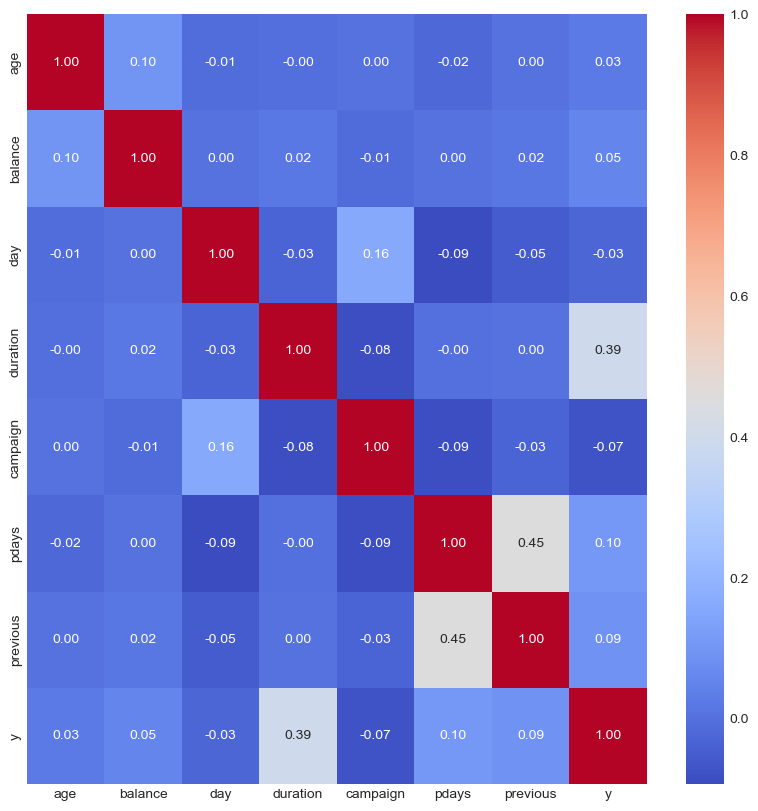

In [15]:
# Convert target variable into numeric
data = df.copy()
data.y = data.y.map({'no':0, 'yes':1}).astype('uint8')
# heatmap of correlations between numerical variables
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

# Balance

As we can see from the plots below, the distribution of the data has been greatly imporved by applying the log transformation. We can compare both the histograms and the boxplots.

/Users/vikasvig/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/vikasvig/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/vikasvig/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/vikasvig/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


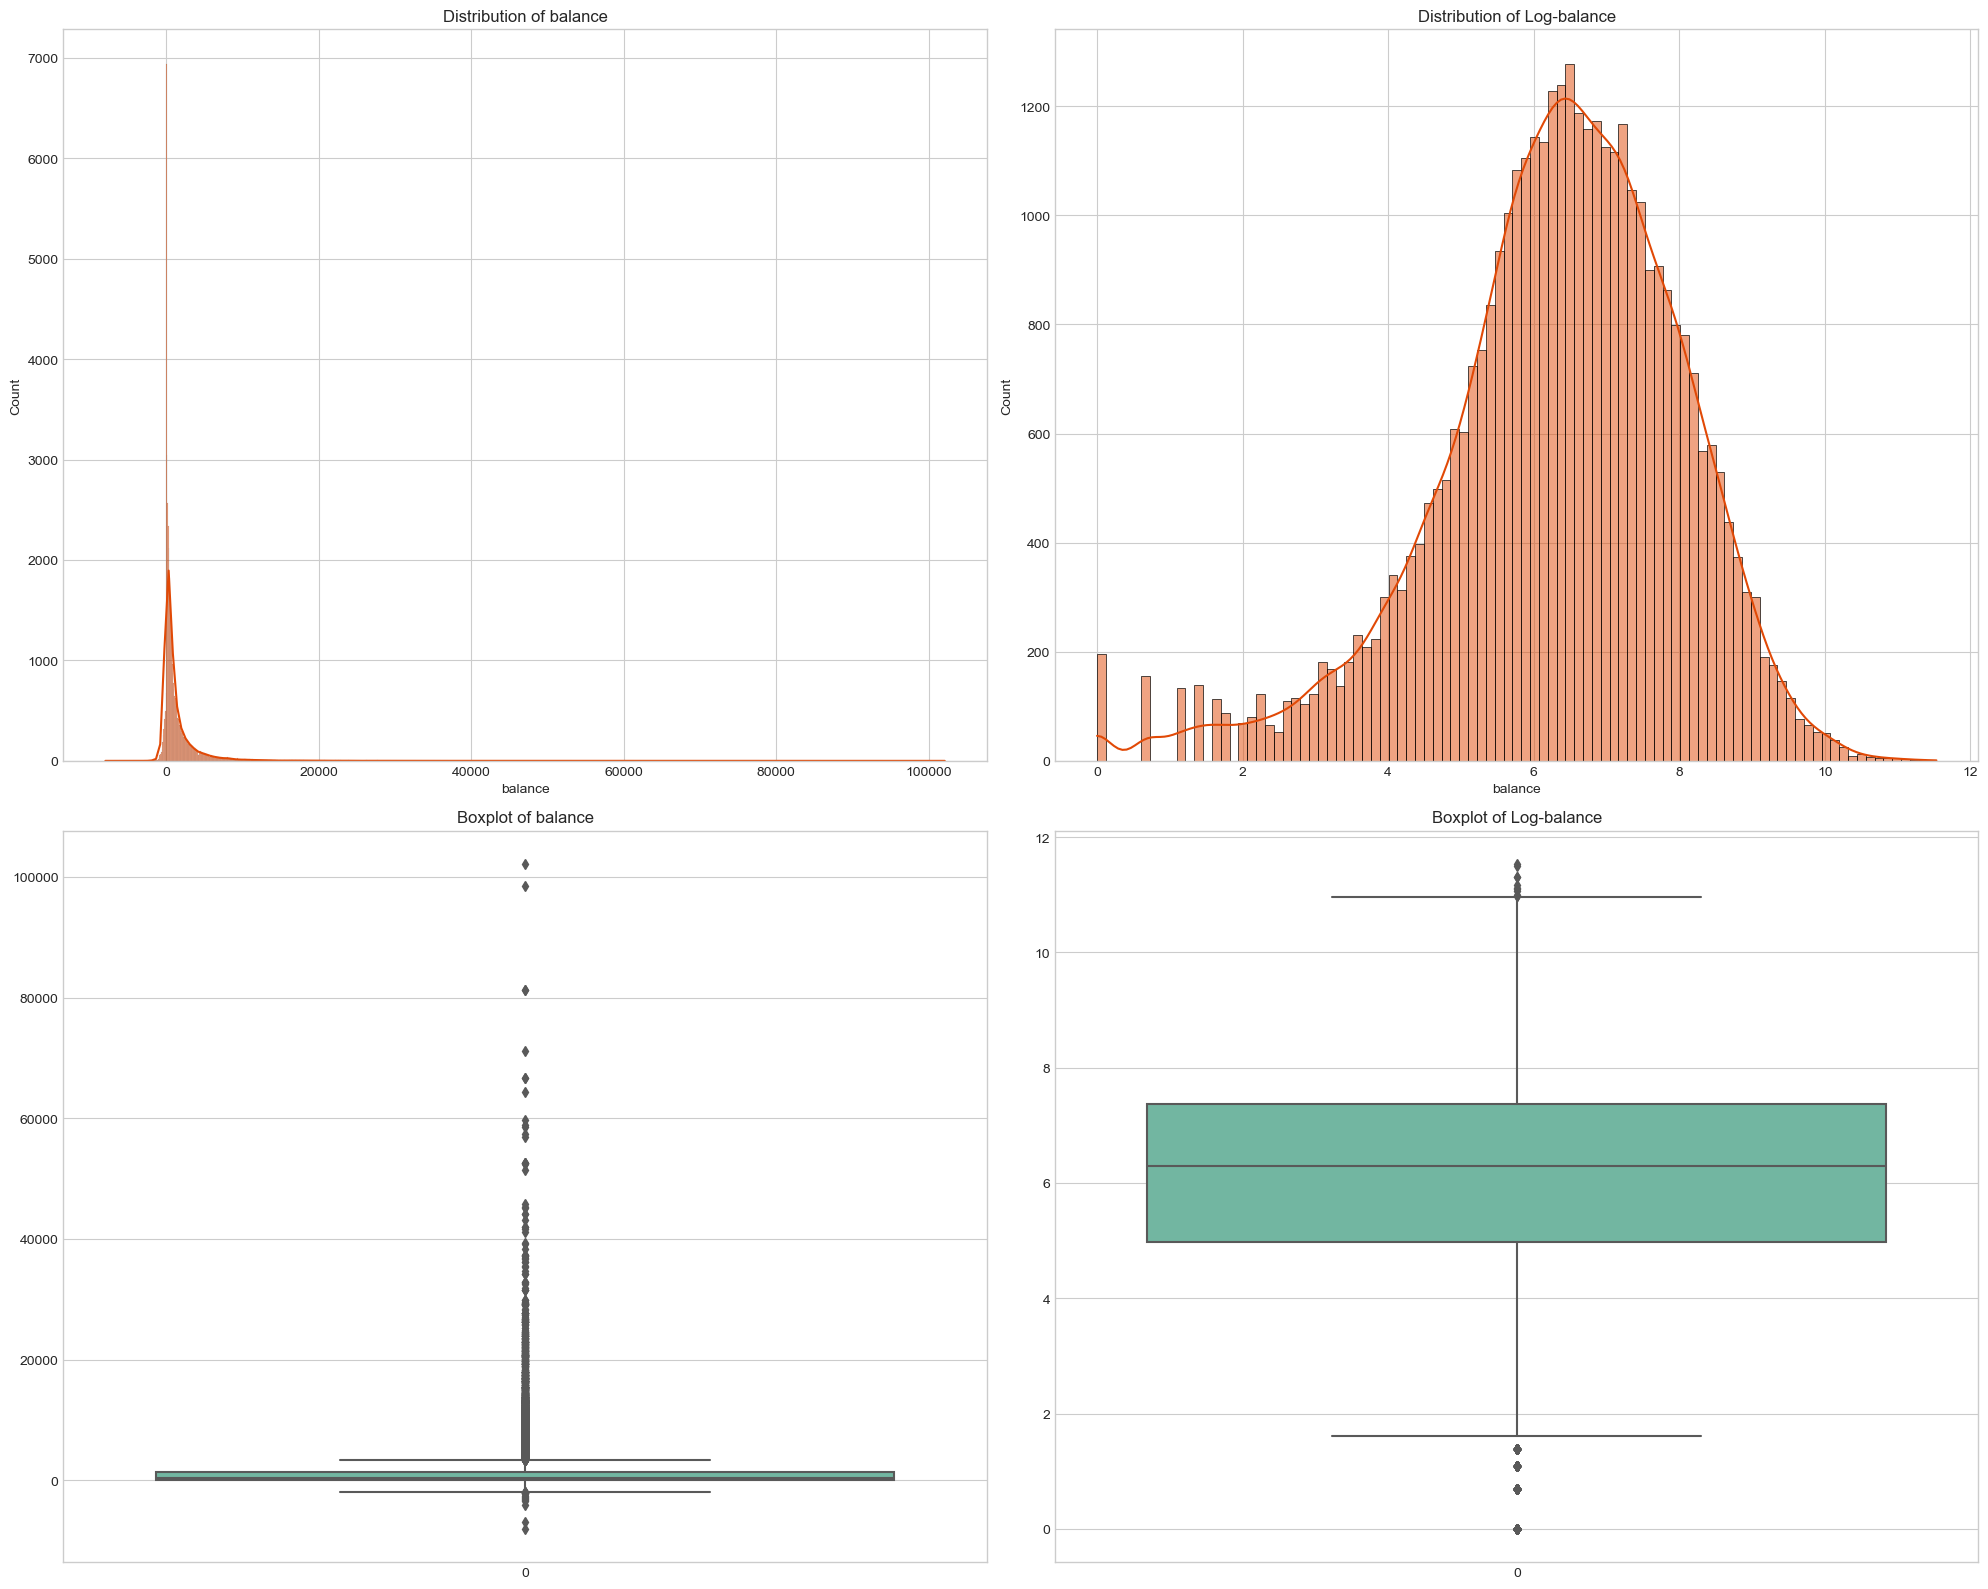

In [16]:
fig, (ax1, ax2) = plt.subplots(2,2, figsize=(20,16))
sns.histplot(data['balance'], kde=True, color='#E14906', ax = ax1[0])
ax1[0].set_title('Distribution of balance')
sns.histplot(np.log(data['balance']), kde=True, color='#E14906', ax = ax1[1])
ax1[1].set_title('Distribution of Log-balance')
sns.boxplot(data['balance'], palette='Set2', ax = ax2[0])
ax2[0].set_title('Boxplot of balance')
sns.boxplot(np.log(data['balance']), palette='Set2', ax = ax2[1])
ax2[1].set_title('Boxplot of Log-balance')
plt.tight_layout()
plt.show()

The bank is interested to know what their target customer profile should be. To determine this, we will create a new class using the marital and education features. This will give us a set of customer profiles based on the combination of customer marital status and education level. This class is made in the code cell below, which also generates a visualization. The resulting visualization shows that:

1. For all combinations of marital and education status, there are more individuals without loans than with loans
2. The category with the most cutomers who have a perevious loan is married&tertiary, which indicates that the bank's target group should be married couples who are highly educated

In [71]:
# Create marital/education class

df['marital&education'] = np.nan
lst = [df]

for col in lst:
    col.loc[(col['marital'] == 'single') & (df['education'] == 'primary'), 'marital&education'] = 'single&primary'
    col.loc[(col['marital'] == 'married') & (df['education'] == 'primary'), 'marital&education'] = 'married&primary'
    col.loc[(col['marital'] == 'divorced') & (df['education'] == 'primary'), 'marital&education'] = 'divorced&primary'
    col.loc[(col['marital'] == 'single') & (df['education'] == 'secondary'), 'marital&education'] = 'single&secondary'
    col.loc[(col['marital'] == 'married') & (df['education'] == 'secondary'), 'marital&education'] = 'married&secondary'
    col.loc[(col['marital'] == 'divorced') & (df['education'] == 'secondary'), 'marital&education'] = 'divorced&secondary'
    col.loc[(col['marital'] == 'single') & (df['education'] == 'tertiary'), 'marital&education'] = 'single&tertiary'
    col.loc[(col['marital'] == 'married') & (df['education'] == 'tertiary'), 'marital&education'] = 'married&tertiary'
    col.loc[(col['marital'] == 'divorced') & (df['education'] == 'tertiary'), 'marital&education'] = 'divorced&tertiary'


# Group data by the new marital&education feature
loan_balance = df.groupby(['marital&education', 'loan'], as_index=False)['balance'].median()

# Create loan category
no_loan = loan_balance['balance'].loc[loan_balance['loan'] == 'no'].values
has_loan = loan_balance['balance'].loc[loan_balance['loan'] == 'yes'].values


# Generate visualization
labels = loan_balance['marital&education'].unique().tolist()

trace0 = go.Scatter(x=no_loan, y=labels, mode='markers', name='No Loan', 
                    marker=dict(color='rgb(51,153,255)',
                    line=dict(color='rgb(0,139,139)', width=1), symbol='circle', size=16))

trace1 = go.Scatter(x=has_loan, y=labels, mode='markers', name='Has a Previous Loan',
                    marker=dict(color='rgb(255,102,102)',
                    line=dict(color='rgb(178,34,34)', width=1), symbol='circle', size=16))

data = [trace0, trace1]
layout = go.Layout(
    title="Customers by Marital & Education Status, and Loan Category ",
    xaxis=dict(
        showgrid=False,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        titlefont=dict(
            color='rgb(204, 204, 204)'),
        tickfont=dict(
            color='rgb(102, 102, 102)'),
        showticklabels=False,
        dtick=10,
        ticks='outside',
        tickcolor='rgb(102, 102, 102)'),
    
    margin=dict(l=140, r=40, b=50,t=80),
    legend=dict(font=dict(size=10,), yanchor='middle', xanchor='right'),
    width=1000,
    height=800,
    plot_bgcolor='rgb(255,255,255)',
    hovermode='closest')

fig = go.Figure(data=data, layout=layout)
iplot(fig)


In [23]:
job_balance

job            balance_status
admin.         high              56376.750000
               low                1239.660107
               negative           -299.786585
blue-collar    high              62792.500000
               low                1239.294664
               negative           -278.526126
entrepreneur   high              49511.000000
               low                1474.451023
               middle            36935.000000
               negative           -346.132743
housemaid      high              45141.000000
               low                1412.364167
               negative           -343.794872
management     high              64089.142857
               low                1813.548671
               middle            36041.300000
               negative           -399.658407
retired        high              68709.500000
               low                1930.117675
               middle            33927.000000
               negative           -286.373984
self

# Campaign

The plots show some improvement after applying the 'thresh' function. However, it seems like the threshold can be further lowered from 10 to about 6. In fact the plot with thresh = 6 does about the same thing as using 'cap' function with IQR.

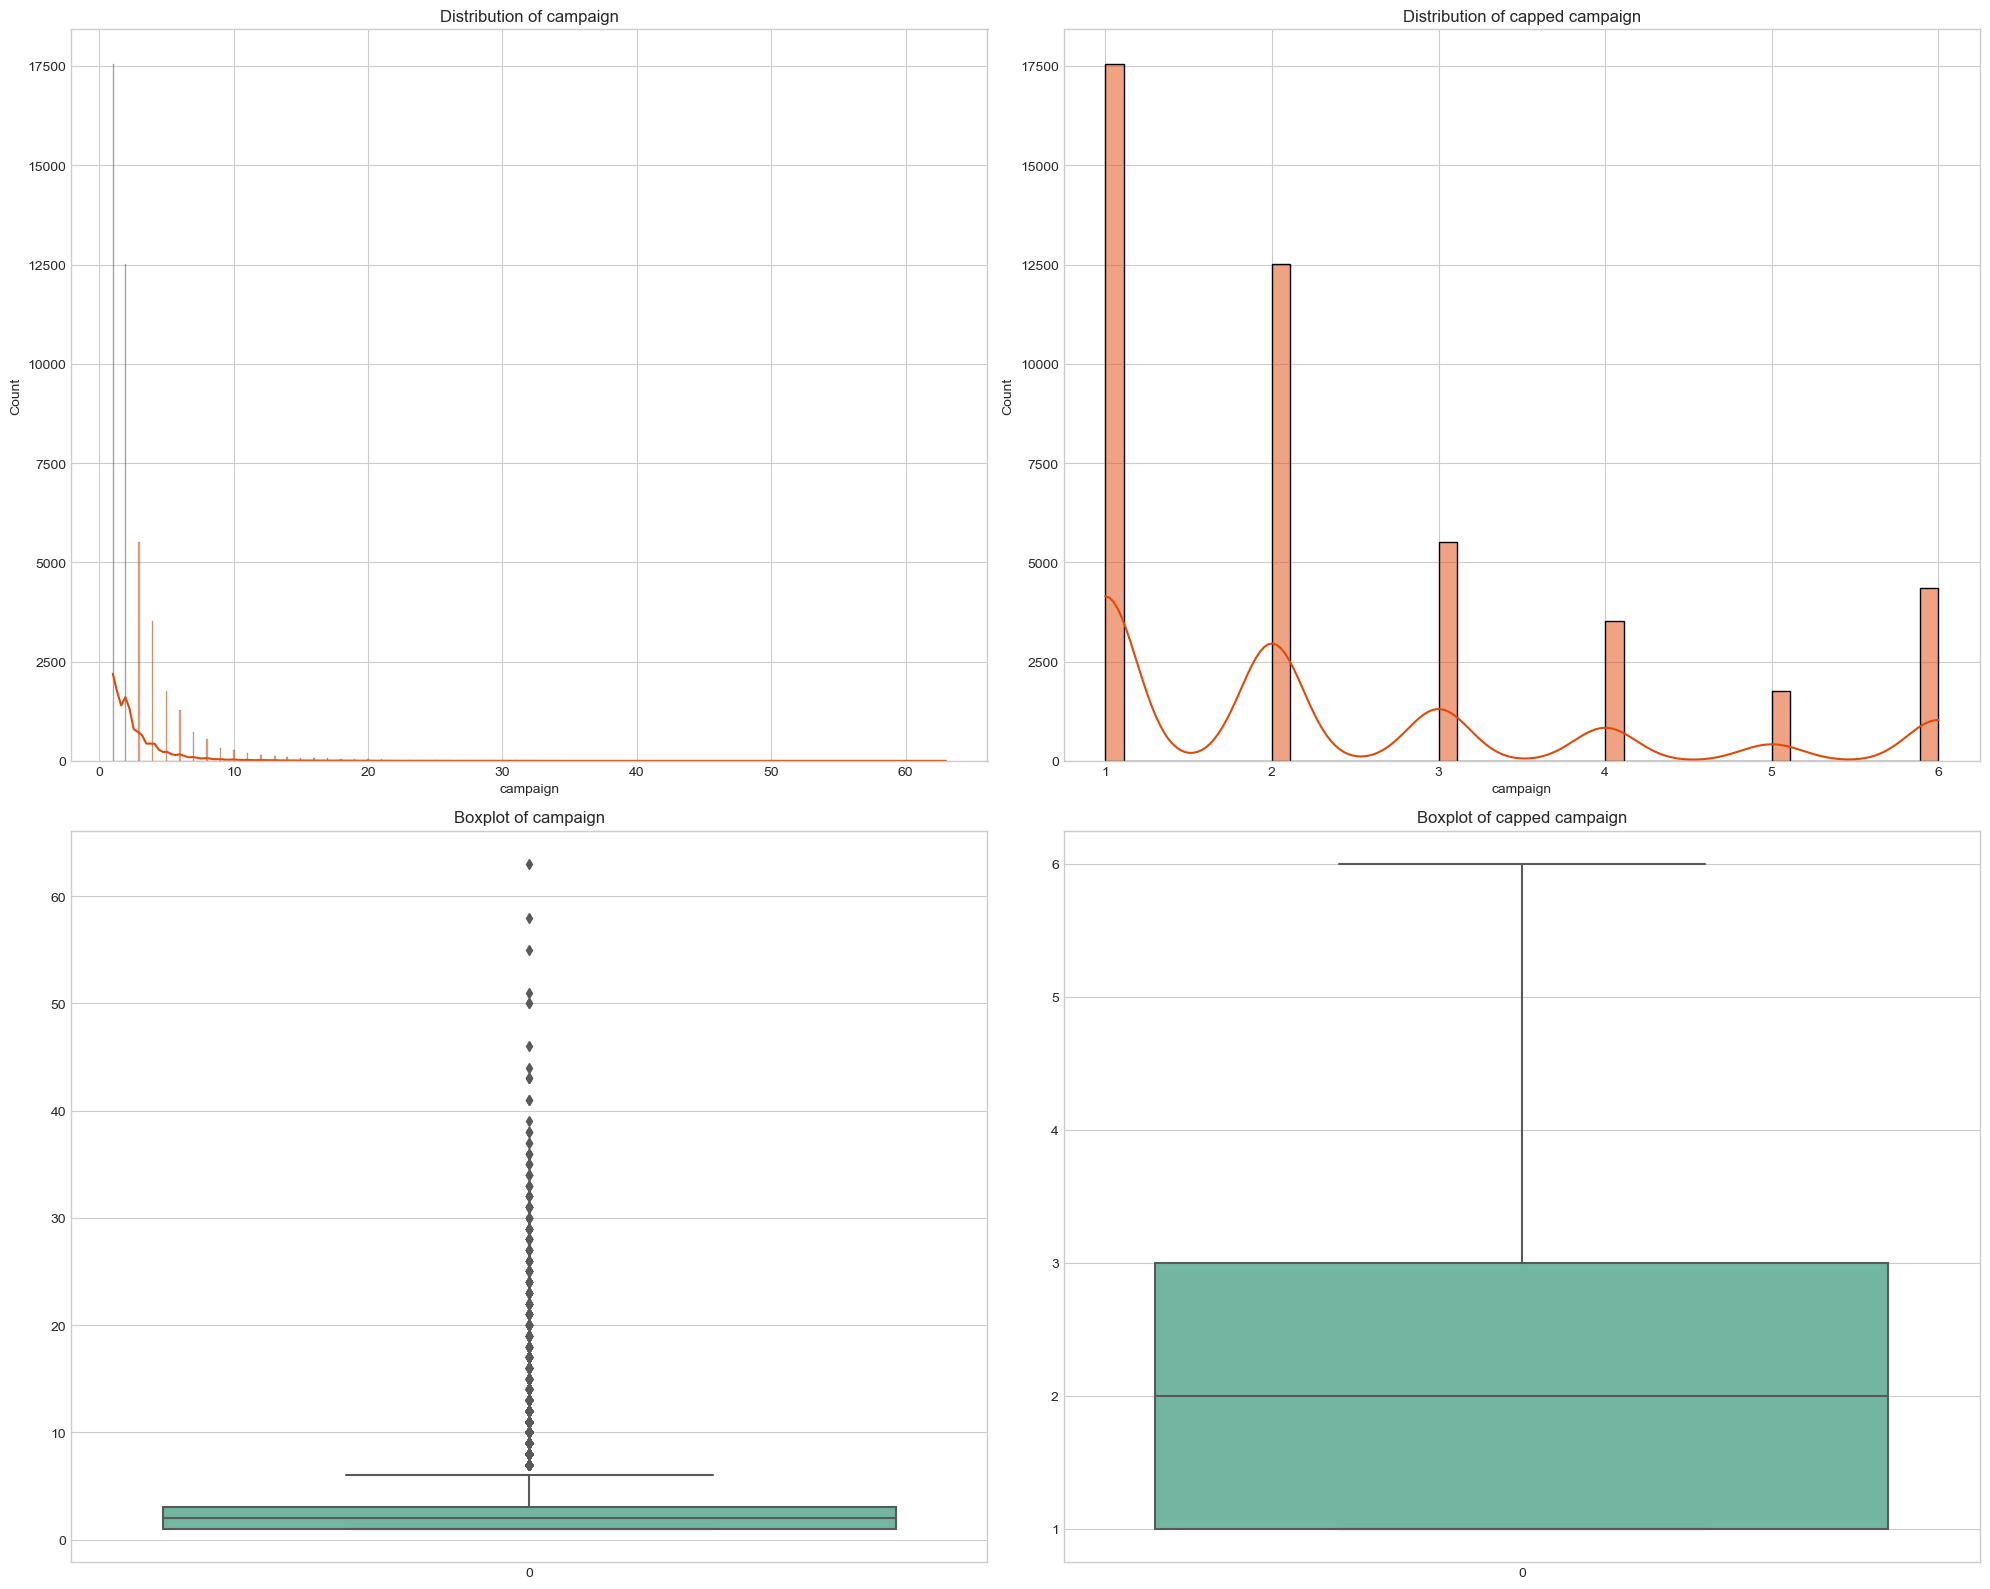

In [17]:
# use thresh function to cap outliers in campaign column
data_cap = thresh(data,'campaign', 6)  # try threshold of 10, 15, 20
# plot histograms and boxplots 
fig, (ax1, ax2) = plt.subplots(2,2, figsize=(20,16))
sns.histplot(data['campaign'], kde=True, color='#E14906', ax = ax1[0])
ax1[0].set_title('Distribution of campaign')
sns.histplot(data_cap['campaign'], kde=True, color='#E14906', ax = ax1[1])
ax1[1].set_title('Distribution of capped campaign')
sns.boxplot(data['campaign'], palette='Set2', ax = ax2[0])
ax2[0].set_title('Boxplot of campaign')
sns.boxplot(data_cap['campaign'], palette='Set2', ax = ax2[1])
ax2[1].set_title('Boxplot of capped campaign')
plt.tight_layout()
plt.show()